# Vamos a utilizar un dataset de perros y gatos para explorar técnicas de Data Augmentation

In [7]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K 

### DATASET:

El Dataset contiene 4000 imágenes de gatos y perros (2000 gatos y 2000 perros). Vamos a usar 2000 imágenes para entrenar, 1000 para validación, 1000 para test.

In [8]:
#subir el archivo perros_y_gatos.zip
# está acá: https://drive.google.com/file/d/1WgbH_Xt421hNhD4gcfwsvtVsFheJKefm/view?usp=sharing\
!gdown --id 1WgbH_Xt421hNhD4gcfwsvtVsFheJKefm

Downloading...
From: https://drive.google.com/uc?id=1WgbH_Xt421hNhD4gcfwsvtVsFheJKefm
To: /content/perros_y_gatos.zip
90.8MB [00:00, 127MB/s]


In [9]:
!unzip /content/perros_y_gatos.zip > /dev/null

replace test/cats/cat.1501.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [10]:
!ls

perros_y_gatos.zip  sample_data  test  train  validation


In [11]:
cd /content

/content


In [12]:
train_dir = './train'
validation_dir = './validation'
test_dir = './test'

### Preprocesamiento de los datos

* Leer las imágenes
* Decodificar los JPEG en imágenes de píxeles RGB
* Convertir estas imágenes en tensores de valores en punto flotante
* Reescalar los valores de los píxeles al intervalo [0,1]


Link : https://keras.io/preprocessing/image/

In [13]:
# Así generamos batches desde los directorios de imágenes
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
# i = 1
# for batch in train_datagen.flow(train_generator, batch_size=1,
#                           save_to_dir='.', save_prefix='img', save_format='jpeg'):
#     i += 1
#     if i > 6:
#         break

# import matplotlib.image as mpimg
# import glob
# import os

# files =glob.glob("./*.jpeg")
# plt.figure(figsize=(10,5))
# i = 1
# for f in files:
#     if i > 6:
#         break 
#     plt.subplot(2,3,i)
#     image = mpimg.imread(f)
#     plt.imshow(image)
#     i+=1
#     os.remove(f)
    
# plt.show()

In [15]:
!ls

perros_y_gatos.zip  sample_data  test  train  validation


In [16]:
model = models.Sequential()

#### COMPLETAR #####
# agregar las siguientes capas:
# convolucional f=(3,3), # de filtros: 32, activación relu
# max pooling f=2, s=2
# convolucional f=(3,3), # de filtros: 64, activación relu
# max pooling f=2, s=2
# convolucional f=(3,3), # de filtros: 128, activación relu
# max pooling f=2, s=2
# convolucional f=(3,3), # de filtros: 128, activación relu
# max pooling f=2, s=2
# capa flatten
# capa densa de 512 elementos activación relu
# capa densa con un output de 1 elemento con activación sigmoidea
model.add(layers.Conv2D(32, 3, activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, 3, activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, 3, activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, 3, activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='relu'))



In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [18]:
# compilar el modelo con binary_crossentropy y optimizador RMSprop con
# learning rate 1e-4, la métrica a usar es la accuracy (acc)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [19]:
# utilizar model.fit_generator para entrenar
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
100/100 [==============================] - 102s 1s/step - loss: 0.7402 - acc: 0.5745 - val_loss: 0.6381 - val_acc: 0.6490
Epoch 2/5
100/100 [==============================] - 100s 996ms/step - loss: 0.6697 - acc: 0.6085 - val_loss: 0.7391 - val_acc: 0.5210
Epoch 3/5
100/100 [==============================] - 99s 990ms/step - loss: 0.6509 - acc: 0.6680 - val_loss: 0.6272 - val_acc: 0.6660
Epoch 4/5
100/100 [==============================] - 100s 996ms/step - loss: 0.5884 - acc: 0.7225 - val_loss: 0.6405 - val_acc: 0.6730
Epoch 5/5
100/100 [==============================] - 100s 996ms/step - loss: 0.5338 - acc: 0.7365 - val_loss: 1.3640 - val_acc: 0.6080


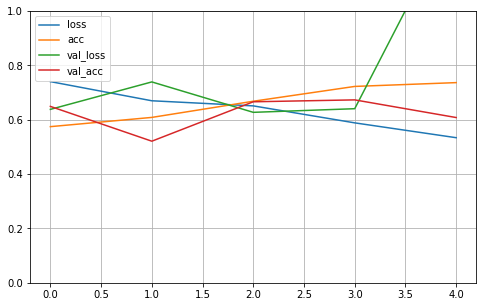

In [20]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [21]:


K.clear_session()
del model

### DATA AUGMENTATION

Distorsión, Rotación, Crop, Flip horizontal: 
![image.png](attachment:image.png)

Vamos a distorsionar (estirando y escalando), rotar las imágenes, invertirlas horizontalmente, hacer zoom en una región, esto va a ser aleatorio dentro de un cierto rango, utilizar ImageDataGenerator con parámetros para que esto ocurra.

https://keras.io/api/preprocessing/image/

https://github.com/keras-team/keras-preprocessing/blob/master/keras_preprocessing/image/image_data_generator.py

https://github.com/keras-team/keras-preprocessing/blob/master/keras_preprocessing/image/affine_transformations.py

usar:

- rotation_range -> rango aleatorio de angulo de rotacions
- width_shift_range -> rango aleatorio de desplazamiento en x expresado como proporcion de la imagen [0,1]
- height_shift_range -> rango aleatorio de desplazamiento en y expresado como proporcion de la imagen [0,1]
- shear_range -> rango aleatorio de 'shear' o cillamiento https://en.wikipedia.org/wiki/Shear_mapping [0,1]
- zoom_range -> rango aleatorio de zoom de la imagen [0,1]
- horizontal_flip -> boolean (si se flipea aleatoriamente la imagen en la dirección horizontal)

In [22]:
train_datagen = ImageDataGenerator(
    rescale=1./255,rotation_range=50,
    )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Veamos algunas imágenes

In [ ]:
i = 1
for batch in train_datagen.flow(train_generator, batch_size=1,
                          save_to_dir='.', save_prefix='img', save_format='jpeg'):
    i += 1
    if i > 6:
        break

import matplotlib.image as mpimg
import glob
import os

files =glob.glob(".\*.jpeg")
plt.figure(figsize=(10,5))
i = 1
for f in files:
    if i > 6:
        break 
    plt.subplot(2,3,i)
    image = mpimg.imread(f)
    plt.imshow(image)
    i+=1
    os.remove(f)
    
plt.show()

In [1]:
model = models.Sequential()

#### COMPLETAR #####
### usar el mismo modelo de antes

# agregar las siguientes capas:
# convolucional f=(3,3), # de filtros: 32, activación relu
# max pooling f=2, s=2
# convolucional f=(3,3), # de filtros: 64, activación relu
# max pooling f=2, s=2
# convolucional f=(3,3), # de filtros: 128, activación relu
# max pooling f=2, s=2
# convolucional f=(3,3), # de filtros: 128, activación relu
# max pooling f=2, s=2
# capa flatten
# capa densa de 512 elementos activación relu
# capa densa con un output de 1 elemento con activación sigmoidea
model.add(layers.Conv2D(32, 3, activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, 3, activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, 3, activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, 3, activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='relu'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

NameError: ignored

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50)

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
keras.backend.clear_session
del model

Con data augmentation se obtuvo una acurracy de 